In [1]:
pwd

'/content'

In [2]:
!pip install keras==2.7.0
!pip install tensorflow==2.7.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.3 MB 5.3 MB/s 
  Attempting uninstall: keras
    Found existing installation: keras 2.9.0
    Uninstalling keras-2.9.0:
      Successfully uninstalled keras-2.9.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.9.2 requires keras<2.10.0,>=2.9.0rc0, but you have keras 2.7.0 which is incompatible.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 671.4 MB 1.7 kB/s 
     |████████████████████████████████| 463 kB 5.3 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.9.0
    Uninstalling tensorflow-estimator-2.9.0:
      Successfully uninstalled tensorflow-estimator-2.9.0

Importing The ImageDataGenerator Library

In [3]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Dropout
from tensorflow.keras.layers import Convolution2D,MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
!pip install ibm_watson_machine_learning

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.8 MB 5.2 MB/s 
     |████████████████████████████████| 51 kB 643 kB/s 
     |████████████████████████████████| 824 kB 37.3 MB/s 
     |████████████████████████████████| 133 kB 39.3 MB/s 
     |████████████████████████████████| 547 kB 46.5 MB/s 
  Created wheel for ibm-cos-sdk: filename=ibm_cos_sdk-2.7.0-py2.py3-none-any.whl size=72563 sha256=e842e7846cd4ba74ba014cb6c075a3ac058fa2d7afc991f182b99ee99ad96207
  Stored in directory: /root/.cache/pip/wheels/47/22/bf/e1154ff0f5de93cc477acd0ca69abfbb8b799c5b28a66b44c2
  Created wheel for ibm-cos-sdk-core: filename=ibm_cos_sdk_core-2.7.0-py2.py3-none-any.whl size=501013 sha256=2408bf4ac60a576e7e0f571d6a3380407ec704fb65efafdf71b2fc63d02fd348
  Stored in directory: /root/.cache/pip/wheels/6c/a2/e4/c16d02f809a3ea998e17cfd02c13369281f3d232aaf5902c19
  Created wheel for ibm-cos-sdk-s3transfer: filename=ibm_cos_

Loading and augmentation of given data

In [8]:
# Now connect notebook ml service with api key and url

from ibm_watson_machine_learning import APIClient
import json
import numpy as np

In [10]:
wml_credentials = {
    "apikey" : "f8CUN72NRZSkZZAdPe5UZJLWMHrqgyXNDGVe5Mv0ryTj",
    "url" : "https://us-south.ml.cloud.ibm.com" 
}

In [11]:
wml_client =APIClient(wml_credentials)

Python 3.7 and 3.8 frameworks are deprecated and will be removed in a future release. Use Python 3.9 framework instead.


In [12]:
wml_client.spaces.list()

Note: 'limit' is not provided. Only first 50 records will be displayed if the number of records exceed 50
------------------------------------  ---------------  ------------------------
ID                                    NAME             CREATED
0e44a056-57bd-41ec-899f-cb960508e4d0  handrecognition  2022-11-19T18:22:02.124Z
------------------------------------  ---------------  ------------------------


In [13]:
SPACE_ID = "0e44a056-57bd-41ec-899f-cb960508e4d0"

In [14]:
wml_client.set.default_space(SPACE_ID)

'SUCCESS'

In [15]:
# To check the environment

wml_client.software_specifications.list()

-----------------------------  ------------------------------------  ----
NAME                           ASSET_ID                              TYPE
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12      020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9      0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6          0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                     0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod   1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6              10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl      111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt22.2-py3.10        125b6d9

In [16]:
import sklearn
sklearn.__version__

'1.0.2'

In [18]:
MODEL_NAME = "handrecognition_DeployedModel"
DEPLOYMENT_NAME = "handrecognition"


In [19]:
# Set Python default version

software_spec_uid = wml_client.software_specifications.get_id_by_name('runtime-22.1-py3.9')

In [20]:
# Setup Model Meta

model_props = {
    wml_client.repository.ModelMetaNames.NAME: MODEL_NAME,
    wml_client.repository.ModelMetaNames.TYPE: 'scikit-learn_1.0',
    wml_client.repository.ModelMetaNames.SOFTWARE_SPEC_UID: software_spec_uid
}
# Save Model

In [22]:
# Download the model locally

wml_client.repository.download('d64f6fff-3860-4477-8867-ae973798b2b6','Deployed_Model1.tar.gz')

Successfully saved model content to file: 'Deployed_Model1.tar.gz'


'/content/Deployed_Model1.tar.gz'

In [24]:
from google.colab import files
import pandas as pd

files.download('Deployed_Model1.tar.gz')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [51]:
model=load_model("deployed_gesture.h5")

In [78]:
from google.colab import files
uploaded = files.upload()

Saving 7.jpg to 7.jpg


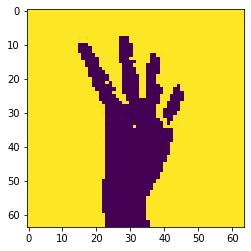

In [79]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2

img=image.load_img('7.jpg', color_mode='grayscale',target_size=(64,64))
imgplot = plt.imshow(img)
plt.show()

In [80]:
res = image.img_to_array(img)
res.shape
type(res)
import numpy as np
res = np.expand_dims(res,axis=0)
res.shape

(1, 64, 64, 1)

In [81]:
pred_res = np.argmax(model.predict(res),axis=-1)
pred_res

array([4])

In [82]:
index = ['0','1','2','3','4','5']
final_res = str(index[pred_res[0]])
final_res

'4'